In [1]:
import numpy as np
import pandas as pd

input_file = "./../train.csv"

def AgeGroup(x):
    if x < 13:
        return 0
    elif x < 18:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return x
    
def FamilySize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
    
def Title(x):
    if x == 'Mlle':
        return 'Miss'
    elif x == 'Ms':
        return 'Miss'
    elif x == 'Mme':
        return 'Mrs'
    elif x == 'Lady':
        return 'Miss'
    elif x  == 'Dona':
        return 'Miss'
    elif x  == 'Capt':
        return 'Officer'
    elif x == 'Col':
        return 'Officer'
    elif x == 'Major':
        return 'Officer'
    elif x == 'Dr':
        return 'Officer'
    elif x == 'Rev':
        return 'Officer'
    elif x == 'Don':
        return 'Officer'
    elif x == 'Sir':
        return 'Officer'
    elif x == 'the Countess':
        return 'Officer'
    elif x == 'Jonkheer':
        return 'Officer'
    else:
        return x
    
def TitleGroup(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Officer':
        return 4
    else:
        return 5
    
def TicketSize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
        

# comma delimited is the default
passengers = pd.read_csv(input_file, header = 0)

passengers['Sex'] = passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

passengers['Age'] = passengers['Age'].fillna(round(passengers['Age'].mean(), 2))

passengers['AgeGroup'] = passengers['Age'].apply(lambda x: AgeGroup(x))

passengers['Embarked'] = passengers['Embarked'] \
    .fillna(passengers['Embarked'].value_counts().idxmax())
    
passengers['Embarked'] = passengers['Embarked'] \
    .apply(lambda x: Embark(x)).astype(int)

passengers['Title'] = passengers['Name'] \
    .replace("^.*, (.*?)\\..*$", "\\1", regex = True) \
    .apply(lambda x: Title(x))

passengers['FamilySize'] = passengers[['SibSp', 'Parch']] \
    .apply(lambda x: FamilySize(x['SibSp'] + x['Parch'] + 1), axis = 1)
    
passengers['TitleGroup'] = passengers['Title'].apply(lambda x: TitleGroup(x))

passengers['TicketSize'] = passengers.groupby(['Ticket'])['Ticket'].transform('count')
passengers['TicketSize'] = passengers['TicketSize'].apply(lambda x: TicketSize(x))

pd.DataFrame.head(passengers, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,TitleGroup,TicketSize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,Mr,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,Mrs,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,Miss,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,Mrs,1,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,2,Mr,0,0,0


In [2]:
from sklearn.tree import DecisionTreeClassifier

X = passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']]
y = passengers['Survived']

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = 'survivor.dot',
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)

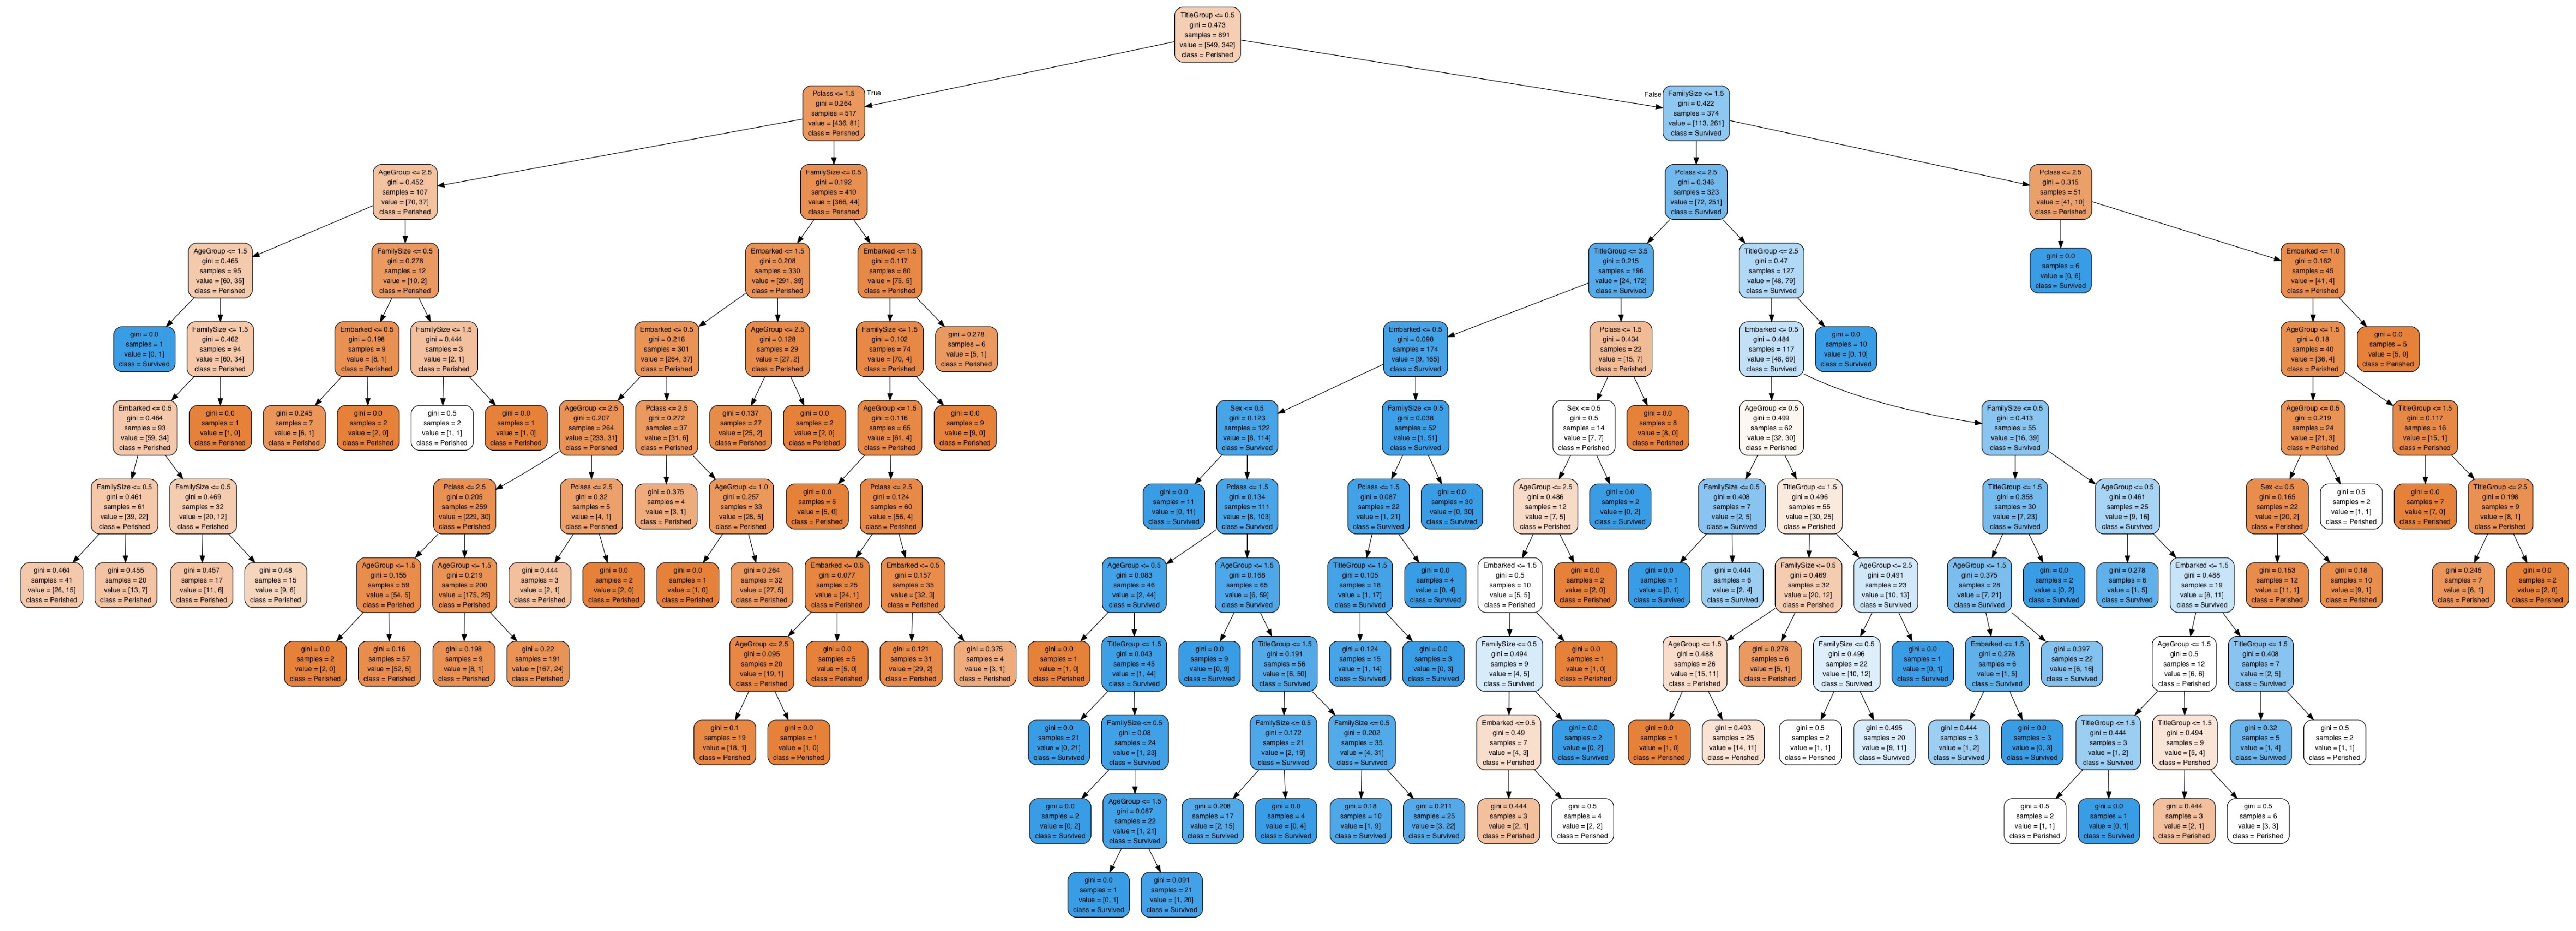

In [4]:
from io import StringIO
from sklearn import tree

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

classifier = tree_clf
dotfile = open("survivor.dot", 'w')
tree.export_graphviz(
    classifier,
    out_file = dotfile,
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
dotfile.close()
dot_data = StringIO()
tree.export_graphviz(
    classifier,
    out_file = dot_data,
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
graph = pydotplus.graph_from_dot_file("survivor.dot")
graph.write_png('survivor.png')
img = mpimg.imread('survivor.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary, interpolation="nearest")
plt.show()

In [5]:
input_test_file = "./../test.csv"

def AgeGroup(x):
    if x < 13:
        return 0
    elif x < 18:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return x
    
def FamilySize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
    
def Title(x):
    if x == 'Mlle':
        return 'Miss'
    elif x == 'Ms':
        return 'Miss'
    elif x == 'Mme':
        return 'Mrs'
    elif x == 'Lady':
        return 'Miss'
    elif x  == 'Dona':
        return 'Miss'
    elif x  == 'Capt':
        return 'Officer'
    elif x == 'Col':
        return 'Officer'
    elif x == 'Major':
        return 'Officer'
    elif x == 'Dr':
        return 'Officer'
    elif x == 'Rev':
        return 'Officer'
    elif x == 'Don':
        return 'Officer'
    elif x == 'Sir':
        return 'Officer'
    elif x == 'the Countess':
        return 'Officer'
    elif x == 'Jonkheer':
        return 'Officer'
    else:
        return x
    
def TitleGroup(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Officer':
        return 4
    else:
        return 5
        
def TicketSize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
        
# comma delimited is the default
test_passengers = pd.read_csv(input_test_file, header = 0)

test_passengers['Sex'] = test_passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

test_passengers['Age'] = test_passengers['Age'] \
    .fillna(round(test_passengers['Age'].mean(), 2))

test_passengers['AgeGroup'] = test_passengers['Age'].apply(lambda x: AgeGroup(x))

test_passengers['Embarked'] = test_passengers['Embarked'] \
    .fillna(test_passengers['Embarked'].value_counts().idxmax())
    
test_passengers['Embarked'] = test_passengers['Embarked'] \
    .apply(lambda x: Embark(x)).astype(int)

test_passengers['Title'] = test_passengers['Name'] \
    .replace("^.*, (.*?)\\..*$", "\\1", regex = True) \
    .apply(lambda x: Title(x))

test_passengers['FamilySize'] = test_passengers[['SibSp', 'Parch']] \
    .apply(lambda x: FamilySize(x['SibSp'] + x['Parch'] + 1), axis = 1)
    
test_passengers['TitleGroup'] = test_passengers['Title'].apply(lambda x: TitleGroup(x))

test_passengers['TicketSize'] = test_passengers \
    .groupby(['Ticket'])['Ticket'].transform('count')
test_passengers['TicketSize'] = test_passengers['TicketSize'].apply(lambda x: TicketSize(x))

pd.DataFrame.head(test_passengers, 5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,TitleGroup,TicketSize
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,2,Mr,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,Mrs,1,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,3,Mr,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,2,Mr,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2,Mrs,1,2,0


In [6]:
tree_clf.predict_proba(test_passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']])[:10]

array([[ 0.92592593,  0.07407407],
       [ 0.45      ,  0.55      ],
       [ 1.        ,  0.        ],
       [ 0.87434555,  0.12565445],
       [ 0.45      ,  0.55      ],
       [ 0.88888889,  0.11111111],
       [ 0.27272727,  0.72727273],
       [ 0.94736842,  0.05263158],
       [ 0.        ,  1.        ],
       [ 0.93548387,  0.06451613]])

In [7]:
test_passengers['Survived'] = tree_clf \
    .predict(test_passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']])

In [8]:
test_passengers[['PassengerId', 'Survived']] \
    .to_csv('test_(Pclass_Sex_Embarked_AgeGroup_FamilySize_TitleGroup)_results.csv', sep=',', index = False, encoding='utf-8')
pd.DataFrame.head(test_passengers)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,TitleGroup,TicketSize,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,2,Mr,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2,Mrs,1,2,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,3,Mr,0,0,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,2,Mr,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2,Mrs,1,2,0,1
